In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
face_cascade=cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

In [4]:
def get_roi_image(path):
    img=cv2.imread(path)
    if img is None:
        return None
    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray_img,1.3,5)
    for (x,y,w,h) in faces:
        roi_color=img[y:y+h,x:x+w]
        roi_gray=gray_img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [5]:
path_to_raw_dataset='./raw_image_dataset'
path_to_croped_images='./croped_image_datset'

In [6]:
import shutil

if os.path.exists(path_to_croped_images):
    shutil.rmtree(path_to_croped_images)
os.mkdir(path_to_croped_images)

In [7]:
list_player_names=[]

for paths in os.scandir(path_to_raw_dataset):
    list_player_names.append(paths.path)

In [8]:
list_player_names

['./raw_image_dataset\\cristiano_ronaldo',
 './raw_image_dataset\\MS_Dhoni',
 './raw_image_dataset\\prabhas',
 './raw_image_dataset\\RDJ',
 './raw_image_dataset\\sundar_pichai']

In [9]:
croped_folders_list=[]
croped_images_paths={}

In [10]:
for path in list_player_names:
    name=path.split('\\')[-1]
    croped_images_paths[name]=[]
    count=0
    for img_path in os.scandir(path):
        roi=get_roi_image(img_path.path)
        if roi is not None:
            person_folder=path_to_croped_images+'\\'+name
            if not (os.path.exists(person_folder)):
                os.makedirs(person_folder)
                print('generate new folder',person_folder)
                croped_folders_list.append(person_folder)
            img_file_path=person_folder+'\\'+name+f'_{count}'+'.png'
            croped_images_paths[name].append(img_file_path)
            cv2.imwrite(img_file_path,roi)
        count+=1

generate new folder ./croped_image_datset\cristiano_ronaldo
generate new folder ./croped_image_datset\MS_Dhoni
generate new folder ./croped_image_datset\prabhas
generate new folder ./croped_image_datset\RDJ
generate new folder ./croped_image_datset\sundar_pichai


In [11]:
croped_folders_list

['./croped_image_datset\\cristiano_ronaldo',
 './croped_image_datset\\MS_Dhoni',
 './croped_image_datset\\prabhas',
 './croped_image_datset\\RDJ',
 './croped_image_datset\\sundar_pichai']

In [12]:
croped_images_paths

{'cristiano_ronaldo': ['./croped_image_datset\\cristiano_ronaldo\\cristiano_ronaldo_5.png',
  './croped_image_datset\\cristiano_ronaldo\\cristiano_ronaldo_6.png',
  './croped_image_datset\\cristiano_ronaldo\\cristiano_ronaldo_10.png',
  './croped_image_datset\\cristiano_ronaldo\\cristiano_ronaldo_11.png',
  './croped_image_datset\\cristiano_ronaldo\\cristiano_ronaldo_12.png',
  './croped_image_datset\\cristiano_ronaldo\\cristiano_ronaldo_13.png',
  './croped_image_datset\\cristiano_ronaldo\\cristiano_ronaldo_15.png',
  './croped_image_datset\\cristiano_ronaldo\\cristiano_ronaldo_18.png',
  './croped_image_datset\\cristiano_ronaldo\\cristiano_ronaldo_23.png',
  './croped_image_datset\\cristiano_ronaldo\\cristiano_ronaldo_30.png',
  './croped_image_datset\\cristiano_ronaldo\\cristiano_ronaldo_32.png',
  './croped_image_datset\\cristiano_ronaldo\\cristiano_ronaldo_33.png',
  './croped_image_datset\\cristiano_ronaldo\\cristiano_ronaldo_36.png',
  './croped_image_datset\\cristiano_ronaldo\\

In [13]:
import pywt
  

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [14]:
person_name_numbers={}
count=0
for person_name in croped_images_paths.keys():
    person_name_numbers[person_name]=count
    count+=1

In [15]:
person_name_numbers

{'cristiano_ronaldo': 0,
 'MS_Dhoni': 1,
 'prabhas': 2,
 'RDJ': 3,
 'sundar_pichai': 4}

In [21]:
x,y=[],[]
for person,images_paths in croped_images_paths.items():
    for img_path in images_paths:
        img=cv2.imread(img_path)
        if img is None:
            continue
        scaled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scaled_har_img=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_har_img.reshape(32*32,1)))
        x.append(combined_img)
        y.append(person_name_numbers[person])
        

In [22]:
len(x)

234

In [23]:
len(x[0])

4096

In [24]:
x=np.array(x).reshape(len(x),4096).astype(float)

In [25]:
x

array([[220., 213., 210., ..., 228.,  98., 146.],
       [ 72.,  60.,  58., ...,  61.,  16., 239.],
       [237., 233., 232., ..., 228.,  54.,  61.],
       ...,
       [102., 136., 125., ...,   7.,   6.,   5.],
       [216., 249., 242., ..., 247.,  20.,  34.],
       [ 24.,  28., 121., ...,   0.,   1.,  56.]])

In [26]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [67]:
svc=SVC(C=10,kernel='rbf')
svc.fit(x_train,y_train)

SVC(C=10)

In [36]:
pipe=Pipeline([('StandardScaler',StandardScaler()),('model',SVC(C=10,kernel='rbf'))])

In [37]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('StandardScaler', StandardScaler()), ('model', SVC(C=10))])

In [217]:
svc.fit(x_train,y_train)

SVC(C=10)

In [38]:
pipe.score(x_test,y_test)

0.7288135593220338

In [41]:
croped_folders_list

['./croped_image_datset\\cristiano_ronaldo',
 './croped_image_datset\\MS_Dhoni',
 './croped_image_datset\\prabhas',
 './croped_image_datset\\RDJ',
 './croped_image_datset\\sundar_pichai']

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib

In [57]:
model_params={'SVC':{
                'model':SVC(gamma='auto',probability=True),
                'params':{
                'svc__C':[1,5,10,100],
                'svc__kernel':['linear','rbf']
                }
            },
             'LogisticRegression':{
                 'model':LogisticRegression(solver='liblinear',multi_class='auto'),
                 'params':{
                     'logisticregression__C':[1,5,10,100]
                 }
             },
             'RandomForestClassifier':{
                 'model':RandomForestClassifier(),
                 'params':{
                     'randomforestclassifier__n_estimators':[1,5,10,20,50,100]
                 }
             }
             }

In [60]:
scores=[]
best_estimators={}
for name,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':name,
        'best_params':clf.best_params_,
        'best_score':clf.best_score_
    })
    best_estimators[name]=clf.best_estimator_
df=pd.DataFrame(scores,['model','best_params','best_score'])

In [61]:
df

,model,best_params,best_score
model,SVC,"{'svc__C': 1, 'svc__kernel': 'linear'}",0.754286
best_params,LogisticRegression,{'logisticregression__C': 1},0.765714
best_score,RandomForestClassifier,{'randomforestclassifier__n_estimators': 50},0.628571


In [63]:
best_estimators['SVC'].score(x_test,y_test)

0.7796610169491526

In [64]:
best_estimators['LogisticRegression'].score(x_test,y_test)

0.7796610169491526

In [65]:
best_estimators['RandomForestClassifier'].score(x_test,y_test)

0.576271186440678

In [68]:
svc.score(x_test,y_test)

0.7627118644067796

In [70]:
best_clf=best_estimators['SVC']

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
cm=confusion_matrix(y_test,best_clf.predict(x_test))

In [76]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'truth')

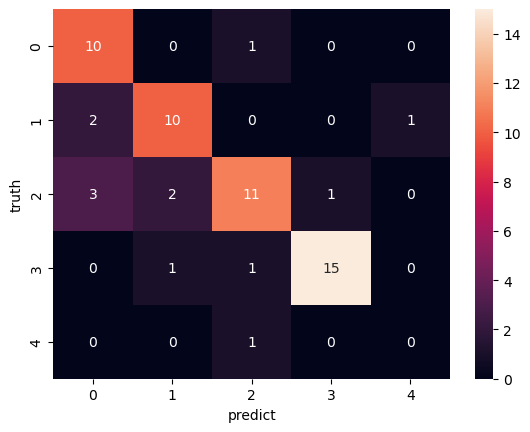

In [78]:
sns.heatmap(cm,annot=True)
plt.xlabel('predict')
plt.ylabel('truth')

In [79]:
import joblib
joblib.dump(best_clf,'my_classifier.pkl')

['my_classifier.pkl']

In [81]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(person_name_numbers))